In [1]:
import os
import sys

import cPickle

module_path = os.path.abspath(os.path.join('../../'))
sys.path.append(module_path)

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

from conf.configure import Configure

In [4]:
train = pd.read_csv(Configure.base_path + 'train/orderFuture_train.csv', encoding='utf8')
test = pd.read_csv('../../result/0.97350_b.csv')
print train.shape, test.shape

(40307, 2) (10076, 2)


In [5]:
with open('../train_0.97329.pkl', "rb") as f:
    lq_train = cPickle.load(f)
with open('../test_0.97329.pkl', "rb") as f:
    lq_test = cPickle.load(f)

used_features = ['userid', 'history_order_type_sum_lg0']

train = pd.merge(train, lq_train[used_features], on='userid', how='left')
test = pd.merge(test, lq_test[used_features], on='userid', how='left')

In [6]:
train.head()

,userid,orderType,history_order_type_sum_lg0
0,100000000013,0,0
1,100000000111,0,0
2,100000000127,0,0
3,100000000231,0,0
4,100000000379,0,0


In [7]:
test.head()

,userid,orderType,history_order_type_sum_lg0
0,100000000371,0.002260,0
1,100000001215,0.001910,0
2,100000001445,0.002609,0
3,100000001575,0.994434,1
4,100000001601,0.000428,0


In [8]:
pos_train = train[train['orderType'] == 1]
neg_train = train[train['orderType'] == 0]

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


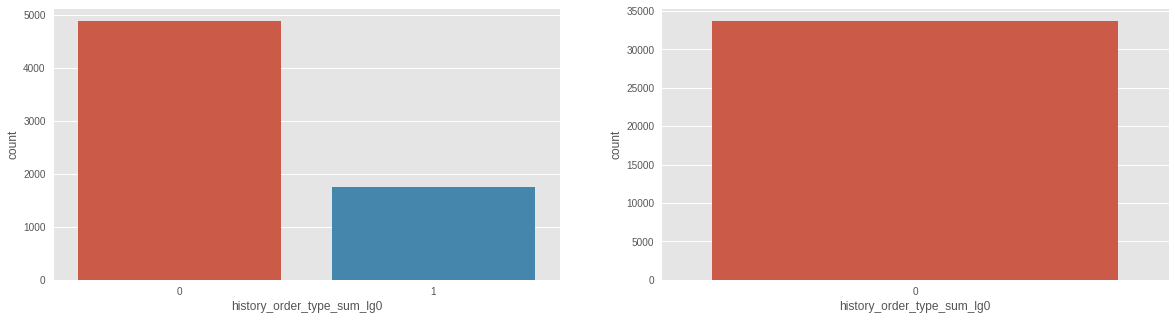

In [9]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.countplot(pos_train.history_order_type_sum_lg0)
plt.subplot(122)
sns.countplot(neg_train.history_order_type_sum_lg0)
plt.show()

规则： 
- history_order_type_sum_lg0 = 1，训练集的 ordertype = 1
- history_order_type_sum_lg0 = 1， 可能为1可能为0

In [10]:
pos_test = test[test['history_order_type_sum_lg0'] == 1]
neg_test = test[test['history_order_type_sum_lg0'] == 0]

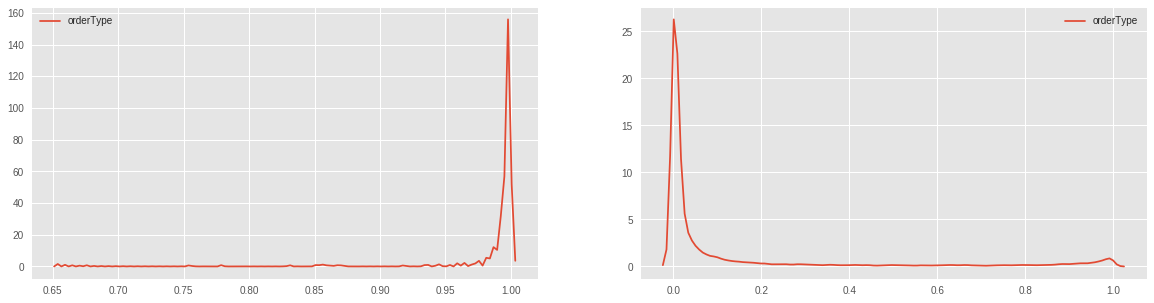

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.kdeplot(pos_test.orderType)
plt.subplot(122)
sns.kdeplot(neg_test.orderType)
plt.show()

In [12]:
pos_test.orderType.min()

0.65452164

## 根据 history_order_type_sum_lg0=1，设置1

In [15]:
print test[(test["history_order_type_sum_lg0"]==1) & (test["orderType"]>0.98)].shape[0]

368


In [16]:
test.loc[test[(test["history_order_type_sum_lg0"]==1) & (test["orderType"]>0.98)].index,"orderType"] = 1 

In [17]:
test[['userid', 'orderType']].to_csv('zcc_final.csv', index=False, columns=['userid', 'orderType'])

In [18]:
print('test count mean: {:.6f} , std: {:.6f}'.format(np.mean(test['orderType']), np.std(test['orderType'])))

test count mean: 0.158855 , std: 0.308332


## 规则无效！